# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
np.shape(df)

(891, 12)

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [3]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
np.shape(df)

(891, 9)

3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [4]:
df['Deck'] = df['Cabin'].str[0]
df.drop('Cabin', axis=1, inplace=True)

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [5]:
df['Deck'] = df['Deck'].astype('category')

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [6]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include=['object', 'category']):
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [7]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [8]:
df.to_json('train.json', orient='records', compression='infer')

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [9]:
print(df.select_dtypes(include="number").mean())
print(df.select_dtypes(exclude="number").mode().iloc[0])

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64
Sex         male
Embarked       S
Deck           C
Name: 0, dtype: object


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [10]:
survivors = df[df["Survived"] == 1]
nonsurvivors = df[df["Survived"] == 0]

def average_passenger(group):
    categorical = group[df.select_dtypes(include=["object", "category"]).columns].mode().iloc[0]
    numerical = group[df.select_dtypes(include=["int64", "float64"]).columns].median()
    return pd.concat([categorical, numerical])

print("=== Average Survivor ===")
print(average_passenger(survivors), "\n")

print("=== Average Non-Survivor ===")
print(average_passenger(nonsurvivors))

=== Average Survivor ===
Sex            female
Embarked            S
Deck                C
Survived          1.0
Pclass            2.0
Age         29.699118
SibSp             0.0
Parch             0.0
Fare             26.0
dtype: object 

=== Average Non-Survivor ===
Sex              male
Embarked            S
Deck                C
Survived          0.0
Pclass            3.0
Age         29.699118
SibSp             0.0
Parch             0.0
Fare             10.5
dtype: object


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [ ]:
%pip install plotly

In [18]:
import plotly.express as px

# 1. Survival rate by sex
fig1 = px.histogram(
    df, 
    x="Sex", 
    color="Survived", 
    barmode="group",
    title="Survival by Sex"
)
fig1.show()

# 2. Age distribution split by survival
fig2 = px.histogram(
    df, 
    x="Age", 
    color="Survived",
    nbins=30,
    opacity=0.7,
    title="Age Distribution (Survivors vs Non-Survivors)"
)
fig2.show()

# 3. Survival by passenger class
fig3 = px.histogram(
    df, 
    x="Pclass", 
    color="Survived", 
    barmode="group",
    title="Survival by Passenger Class"
)
fig3.show()

# 4. Interactive scatterplot Age vs Fare
fig4 = px.scatter(
    df, 
    x="Age", 
    y="Fare", 
    color="Survived",
    symbol="Sex",
    hover_data=["Pclass", "Embarked"],
    title="Age vs Fare by Survival"
)
fig4.show()

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

In [ ]:
%pip install seaborn

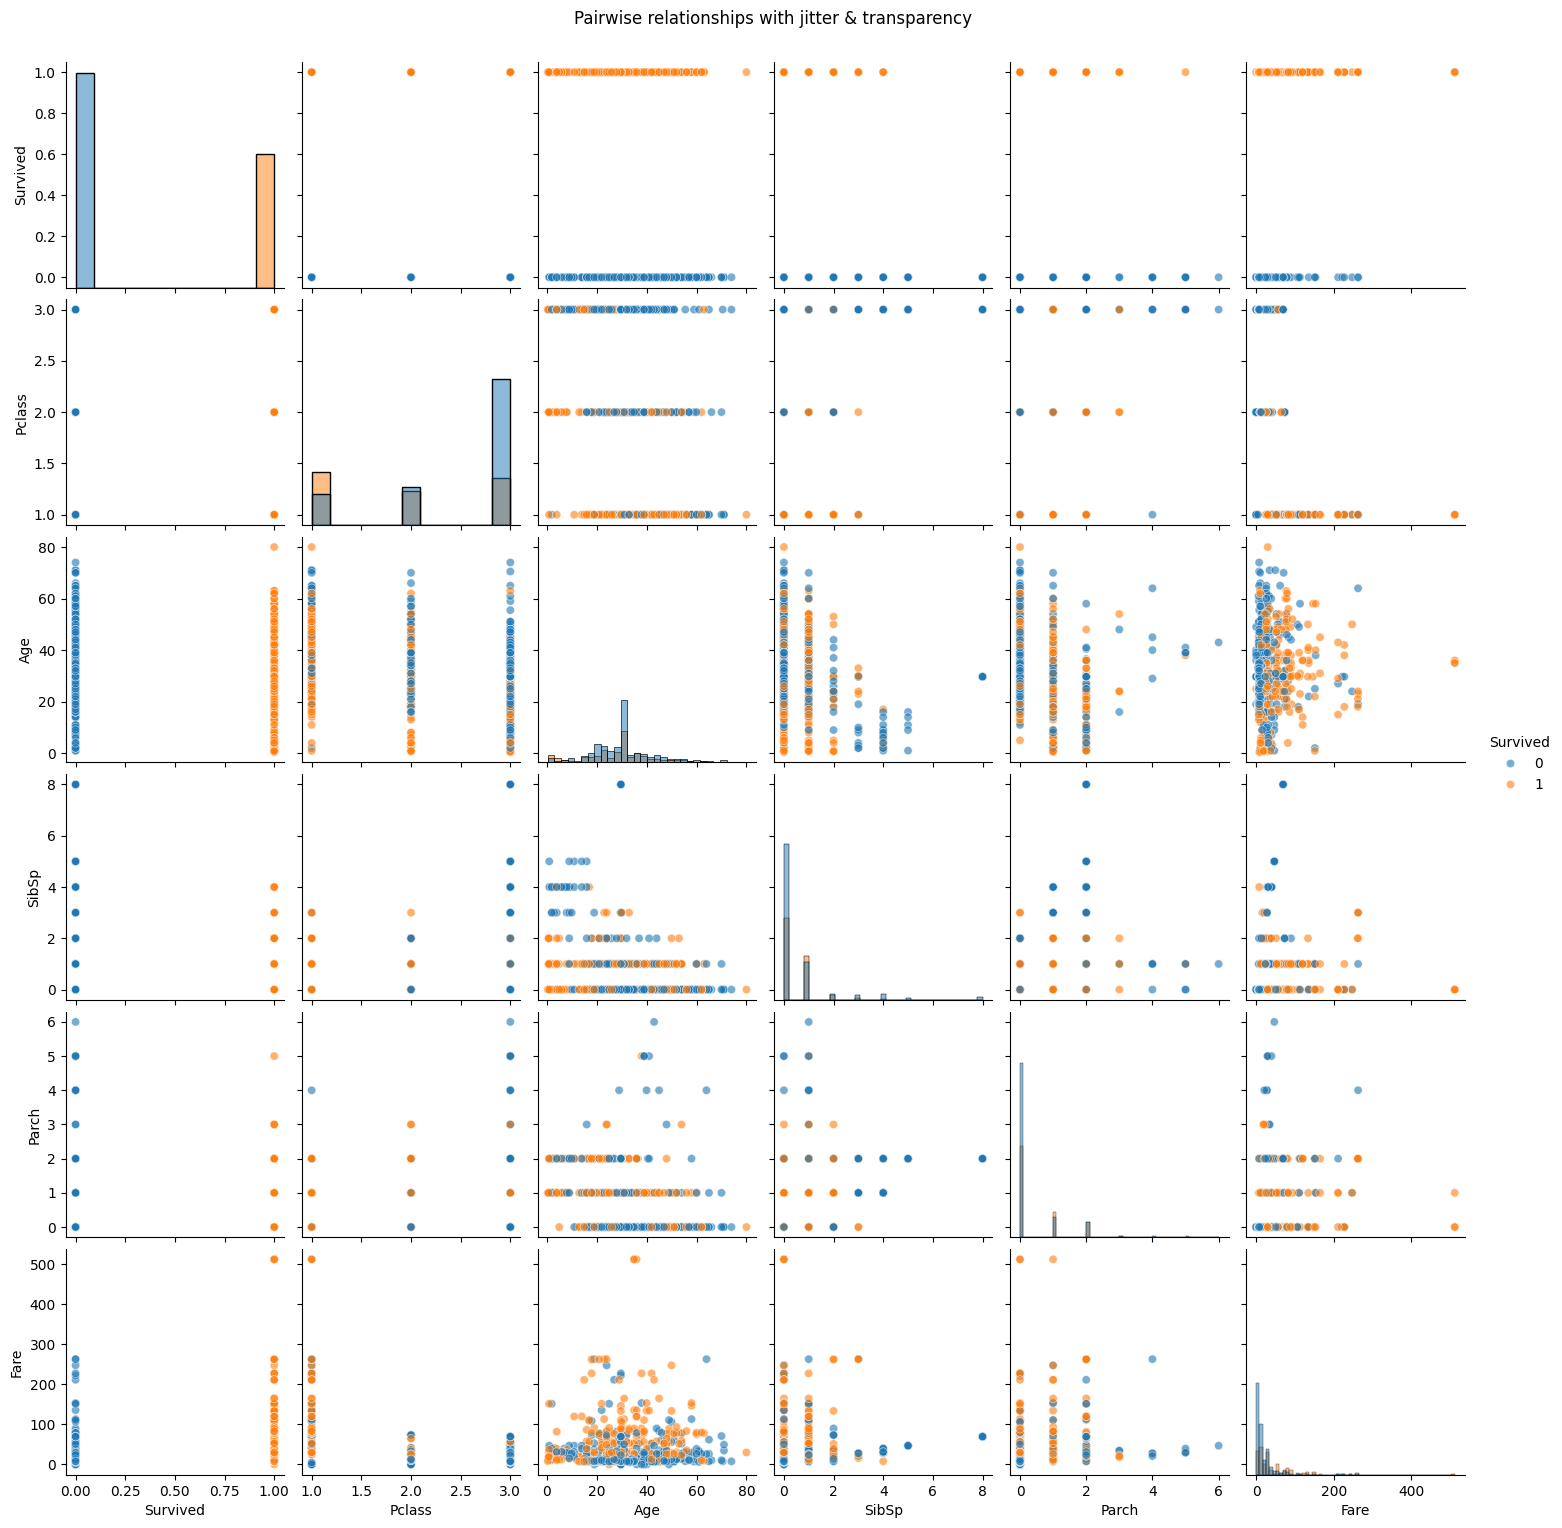

In [24]:
# Make a copy to avoid modifying original df
df_jitter = df.copy()

# Add jitter to categorical numeric columns
df_jitter["Pclass_jitter"] = df_jitter["Pclass"] + np.random.uniform(-0.2, 0.2, size=len(df_jitter))
# If Deck is encoded numerically:
# df_jitter["Deck_jitter"] = df_jitter["Deck"] + np.random.uniform(-0.2, 0.2, size=len(df_jitter))

# Select numeric columns for pairplot (use jittered versions where appropriate)
numeric_cols = ["Age", "Fare", "SibSp", "Parch", "Pclass_jitter"]  # add Deck_jitter if needed

sns.pairplot(
    df_jitter,
    vars=df.select_dtypes(include=["int64", "float64"]).columns,
    hue="Survived",
    kind="scatter",
    diag_kind="hist",
    plot_kws={"alpha": 0.6}  # transparency
)
plt.suptitle("Pairwise relationships with jitter & transparency", y=1.02)
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

The age mean is at least on my end the same on survivors and nonsurvivors. I guess it makes sense to include all passengers with imputed modes and means but in the future I should probably somehow note in the visualizations whether a variable has been imputed or not. Definitely better than if we didn't include these missing data passengers at all.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [25]:
from collections import Counter
import re

# Load text files
with open("pos.txt", "r", encoding="utf-8") as f:
    pos_text = f.read()

with open("neg.txt", "r", encoding="utf-8") as f:
    neg_text = f.read()

def tokenize(text):
    # Lowercase, remove non-alphanumeric characters, split by whitespace
    words = re.findall(r'\b\w+\b', text.lower())
    return words

pos_words = tokenize(pos_text)
neg_words = tokenize(neg_text)

# Count occurrences
pos_counter = Counter(pos_words)
neg_counter = Counter(neg_words)

# Most common words
print("Top 20 positive words:")
print(pos_counter.most_common(20))

print("\nTop 20 negative words:")
print(neg_counter.most_common(20))

Top 20 positive words:
[('great', 435906), ('work', 427780), ('use', 345233), ('good', 291448), ('fit', 273505), ('instal', 229408), ('product', 210084), ('look', 181401), ('just', 180420), ('like', 175725), ('easi', 162864), ('light', 147321), ('car', 147195), ('price', 144891), ('need', 136519), ('perfect', 124405), ('time', 123938), ('replac', 122261), ('qualiti', 119732), ('nice', 119314)]

Top 20 negative words:
[('work', 39998), ('use', 37244), ('fit', 31293), ('product', 24394), ('just', 23580), ('light', 22907), ('like', 20685), ('time', 19665), ('look', 18824), ('instal', 18709), ('did', 18446), ('good', 17295), ('dont', 17136), ('buy', 16885), ('car', 16694), ('return', 15227), ('tri', 14957), ('doe', 14201), ('replac', 13509), ('didnt', 13045)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [26]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Read reviews ---
with open("pos.txt", "r", encoding="utf-8") as f:
    pos_reviews = f.read().splitlines()  # each line = one review

with open("neg.txt", "r", encoding="utf-8") as f:
    neg_reviews = f.read().splitlines()

# --- Create corpus ---
corpus = pos_reviews + neg_reviews

# --- Create TF/IDF vectorizer ---
vectorizer = TfidfVectorizer()  # optional: remove stopwords
X = vectorizer.fit_transform(corpus)  # shape = (#reviews, #unique words)
feature_names = vectorizer.get_feature_names_out()

print("TF/IDF matrix shape:", X.shape)
print("Number of unique words:", len(feature_names))

TF/IDF matrix shape: (1608870, 235581)
Number of unique words: 235581


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [38]:
import numpy as np

# --- Create labels ---
labels = [1]*len(pos_reviews) + [0]*len(neg_reviews)  # 1=positive, 0=negative

# --- Separate indices per class ---
pos_indices = np.where(np.array(labels) == 1)[0]
neg_indices = np.where(np.array(labels) == 0)[0]

# --- Compute average TF/IDF per word for each class ---
pos_tfidf = X[pos_indices].mean(axis=0).A1
neg_tfidf = X[neg_indices].mean(axis=0).A1

# --- Get top 20 words per class ---
top_pos_indices = pos_tfidf.argsort()[::-1][:20]
top_neg_indices = neg_tfidf.argsort()[::-1][:20]

# --- Print results ---
print("Top 20 positive TF/IDF words:")
for i in top_pos_indices:
    print(feature_names[i], f"{pos_tfidf[i]:.4f}")

print("\nTop 20 negative TF/IDF words:")
for i in top_neg_indices:
    print(feature_names[i], f"{neg_tfidf[i]:.4f}")

Top 20 positive TF/IDF words:
great 0.0672
work 0.0587
good 0.0502
fit 0.0343
product 0.0319
perfect 0.0257
use 0.0224
price 0.0221
instal 0.0219
easi 0.0208
look 0.0202
nice 0.0199
qualiti 0.0183
like 0.0163
just 0.0162
light 0.0135
need 0.0133
excel 0.0130
love 0.0126
replac 0.0124

Top 20 negative TF/IDF words:
work 0.0287
fit 0.0275
did 0.0235
return 0.0225
use 0.0223
didnt 0.0199
light 0.0192
dont 0.0177
product 0.0170
month 0.0161
doe 0.0160
buy 0.0160
just 0.0152
time 0.0147
like 0.0146
money 0.0145
cheap 0.0139
look 0.0138
good 0.0135
bulb 0.0130


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

In [40]:
%pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 8.8 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


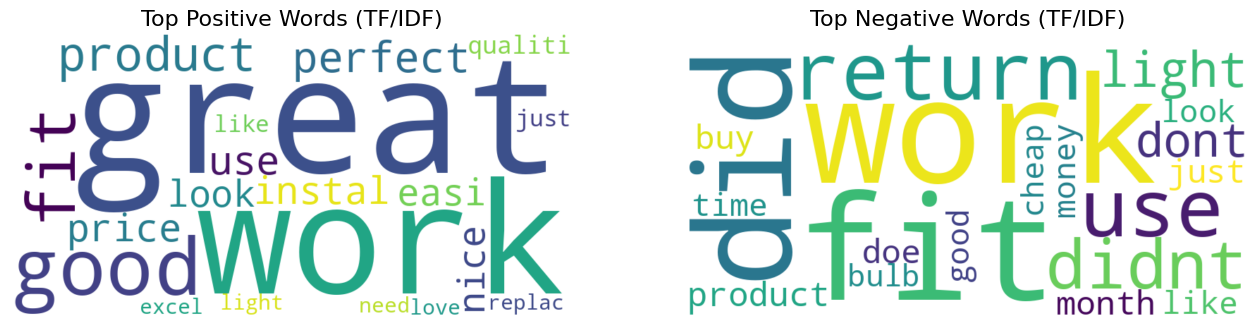

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Create dictionaries of words and TF/IDF scores ---
top_pos_words = {feature_names[i]: pos_tfidf[i] for i in top_pos_indices}
top_neg_words = {feature_names[i]: neg_tfidf[i] for i in top_neg_indices}

# --- Generate word clouds ---
pos_wc = WordCloud(width=800, height=400, background_color='white')
neg_wc = WordCloud(width=800, height=400, background_color='white')

pos_wc.generate_from_frequencies(top_pos_words)
neg_wc.generate_from_frequencies(top_neg_words)

# --- Plot ---
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Positive Words (TF/IDF)', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top Negative Words (TF/IDF)', fontsize=16)

plt.show()


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**

1. ![image1](./week2image1.png)

Ruvinskiy 2025. Heavy use of red and green (bad for color blind i think). To granular and detailed pillars in the primary image. One axis title is sideways and hard to read. Some axes are too small to read and too detailed yet small.

2. ![image2](week2image2.png)

Ayanfe 2025. The colors of the balls are too similar so they blend in. One axis title is sideways.

3. ![image3](week2image3.png)

Nikinmaa 2025. Almost all text are sideways and for some reason something about the color blue or the tight knit pillars make my eyes hurt just by watching.

Fixes: Use a palette for the color blind. For example use yellow and blue in the first example. For sideways, hard to read axis titles you can "rotate" them in plotly by hiding the axis title and replacing it with an annotation (example below). Might not be the most optimal solution but its more readable this way. The last probelmatic chart has x axis labels sideways. The code example using plotly at the end of this document shows you can just set them as x axis labels instead of putting them on top of the bars.

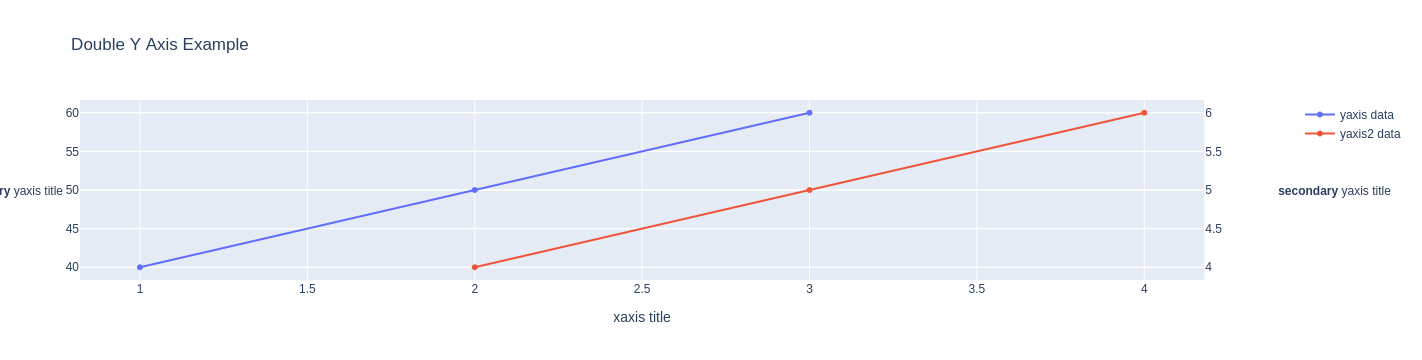

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(title_text="Double Y Axis Example")

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Hide default y-axis titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

# Primary y-axis title (horizontal)
fig.add_annotation(
    x=-0.1,    # left of the plot
    y=0.5,     # middle of y-axis
    text="<b>primary</b> yaxis title",
    showarrow=False,
    xref="paper",
    yref="paper",
    textangle=0
)

# Secondary y-axis title (horizontal, flipped)
fig.add_annotation(
    x=1.1,     # right of the plot
    y=0.5,
    text="<b>secondary</b> yaxis title",
    showarrow=False,
    xref="paper",
    yref="paper",
    textangle=0
)

fig.show()


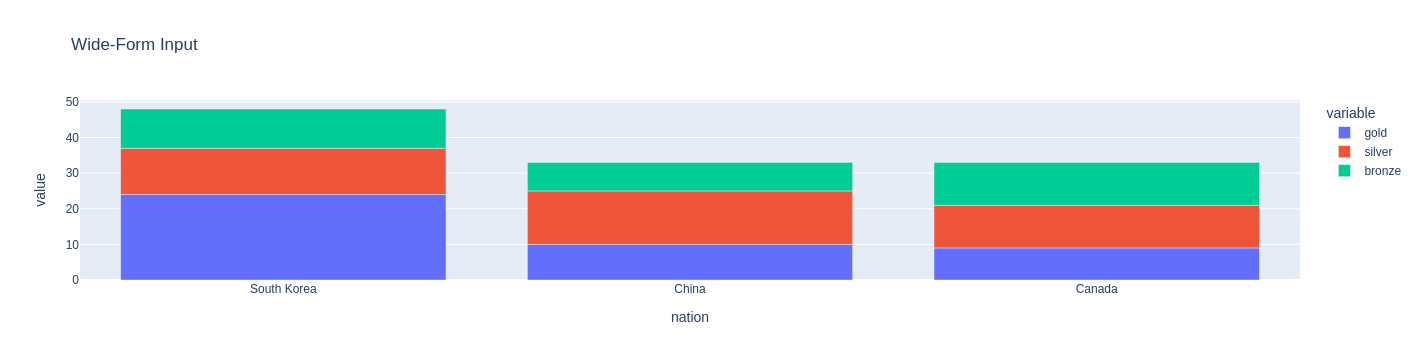

In [51]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()